## Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from zeiss_iot.data.data_import import read_temp_data
df = read_temp_data()
df.head(10)

,source_id,datetime,property_name,temperature
0,MICDEV001,2019-04-13T17:51:16.000+0000,heating_temperature,33.3
1,MICDEV001,2019-04-13T17:51:16.000+0000,cooling_temperature,15.0
2,MICDEV001,2019-04-13T18:51:18.000+0000,heating_temperature,34.0
3,MICDEV001,2019-04-13T19:51:20.000+0000,heating_temperature,33.8
4,MICDEV001,2019-04-13T20:51:21.000+0000,heating_temperature,34.2
5,MICDEV001,2019-04-13T21:51:23.000+0000,heating_temperature,34.5
6,MICDEV001,2019-04-13T22:51:25.000+0000,heating_temperature,34.7
7,MICDEV001,2019-04-13T23:51:26.000+0000,heating_temperature,34.8
8,MICDEV001,2019-04-14T00:51:28.000+0000,heating_temperature,34.9
9,MICDEV001,2019-04-14T01:51:30.000+0000,heating_temperature,35.0


In [2]:
# convert to datetime object for easier manipulation
# created additional date and time columns for deeper analysis fo data.
df["datetime"] = pd.to_datetime(df["datetime"])
df["date"] = df["datetime"].apply(lambda x: x.date())
df["time"] = df["datetime"].apply(lambda x: x.time())
df["month"] = df["datetime"].dt.to_period("M")
df["year"] = df["datetime"].dt.to_period("Y")

df.sort_values(by=["date", "time"], inplace=True)
df.head()

/var/folders/jd/3tb84s2s4_ldrlmvh0dmfvv00000gn/T/ipykernel_89189/4227973039.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["month"] = df["datetime"].dt.to_period("M")
/var/folders/jd/3tb84s2s4_ldrlmvh0dmfvv00000gn/T/ipykernel_89189/4227973039.py:7: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["year"] = df["datetime"].dt.to_period("Y")


,source_id,datetime,property_name,temperature,date,time,month,year
0,MICDEV001,2019-04-13 17:51:16+00:00,heating_temperature,33.3,2019-04-13,17:51:16,2019-04,2019
1,MICDEV001,2019-04-13 17:51:16+00:00,cooling_temperature,15.0,2019-04-13,17:51:16,2019-04,2019
2,MICDEV001,2019-04-13 18:51:18+00:00,heating_temperature,34.0,2019-04-13,18:51:18,2019-04,2019
3,MICDEV001,2019-04-13 19:51:20+00:00,heating_temperature,33.8,2019-04-13,19:51:20,2019-04,2019
4,MICDEV001,2019-04-13 20:51:21+00:00,heating_temperature,34.2,2019-04-13,20:51:21,2019-04,2019


## Data Exploration

### Missing Values:
There are no missing values in any of the columns as evident in the below two cells.

In [3]:
# check missing values / null values
# check missing values and datatypes for columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   source_id      1000 non-null   object             
 1   datetime       1000 non-null   datetime64[ns, UTC]
 2   property_name  1000 non-null   object             
 3   temperature    1000 non-null   float64            
 4   date           1000 non-null   object             
 5   time           1000 non-null   object             
 6   month          1000 non-null   period[M]          
 7   year           1000 non-null   period[Y-DEC]      
dtypes: datetime64[ns, UTC](1), float64(1), object(4), period[M](1), period[Y-DEC](1)
memory usage: 62.6+ KB


In [4]:
# check the number of missing values for each column
print("Shape of dataframe: ", df.shape)
df.isna().sum()

Shape of dataframe:  (1000, 8)


source_id        0
datetime         0
property_name    0
temperature      0
date             0
time             0
month            0
year             0
dtype: int64

### Data distribution
In the given data,
* There is only one unique source id: MICDEV001
* There are only 2 propert_names: heating_temp & cooling_temp.
* There are of course many unique dates. The data is from the time period of 13 April 2019 to 24 January 2020.
* At the first glance, it seems that the data is collected over a 24 hour period.
* The temperature sensor readings are in the range of 14.9 to 39.4 units.

**Assumption**:
    * Temperature is assumed to be in degree Celcius. Because there is no mention of the where and for what purpose, the temperature sensor was used. 

In [5]:
# check data distribution of each column
print("# Unique source_id: ", df["source_id"].nunique())
print("# Unique property_name: ", df["property_name"].nunique()) # heating_temp & cooling_temp
print("# Unique date : ", df["date"].nunique())
print("Min date: ", df["date"].min())
print("Max date: ", df["date"].max())
print("Min time: ", df["time"].min())
print("Max time: ", df["time"].max())
print("Min temperature: ", df["temperature"].min())
print("Max temperature: ", df["temperature"].max())

# Unique source_id:  1
# Unique property_name:  2
# Unique date :  81
Min date:  2019-04-13
Max date:  2020-01-24
Min time:  00:00:53
Max time:  23:57:34
Min temperature:  14.9
Max temperature:  39.4


## Data Visualisation

### Analysis: property_name
* The number of heating temperature data points is almost twice as cooling temperature data points.
* There is a big overlap between range of heating and cooling temperatures from 22.5 to 32.5.

In [6]:
df["property_name"].value_counts()

property_name
heating_temperature    699
cooling_temperature    301
Name: count, dtype: int64

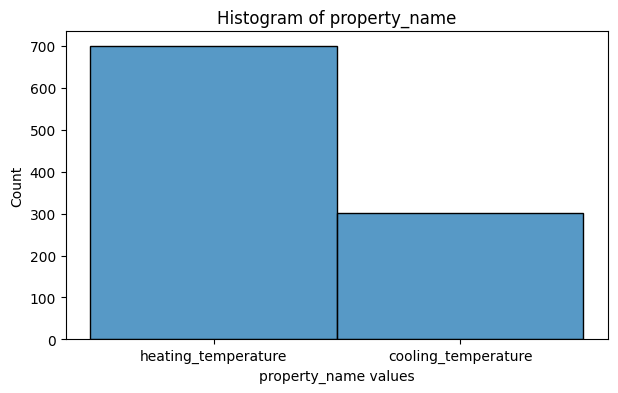

In [7]:
# Create a histogram using Seaborn
plt.figure(figsize=(7, 4))
sns.histplot(data=df, x="property_name", color="Tab:blue")
plt.title("Histogram of property_name")
plt.xlabel("property_name values")
plt.ylabel("Count")
plt.show()

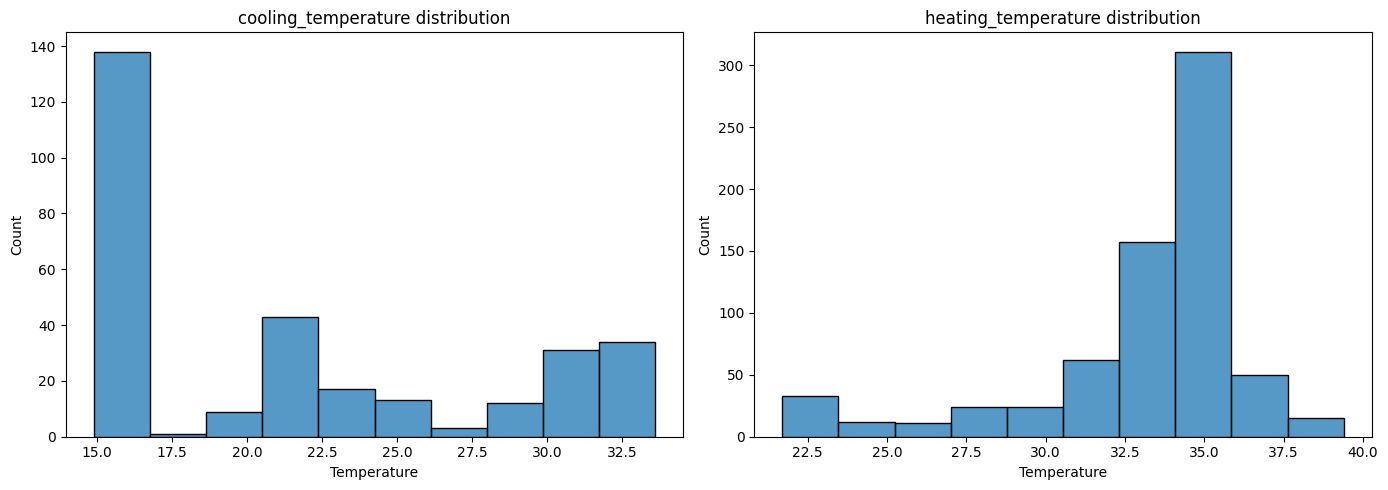

In [8]:
fig = plt.figure(figsize=(14, 5))
for index, param in enumerate(["cooling_temperature", "heating_temperature"]):
    plt.subplot(1, 2, index+1)
    sns.histplot(
        data=df[df["property_name"] == param],
        x="temperature",
        bins=10,
        color="Tab:blue"
    )
    plt.xlabel("Temperature")
    plt.ylabel("Count")
    plt.title(f"{param} distribution")

fig.tight_layout()

### Analysis: Month & Year
* There is missing data from time period Aug 2019 to Sept 2019.
* Majority of the data is from 2019.
* Summer months from April to July seem to have the most variations in temperature or usage of the instrument with the temperature sensor

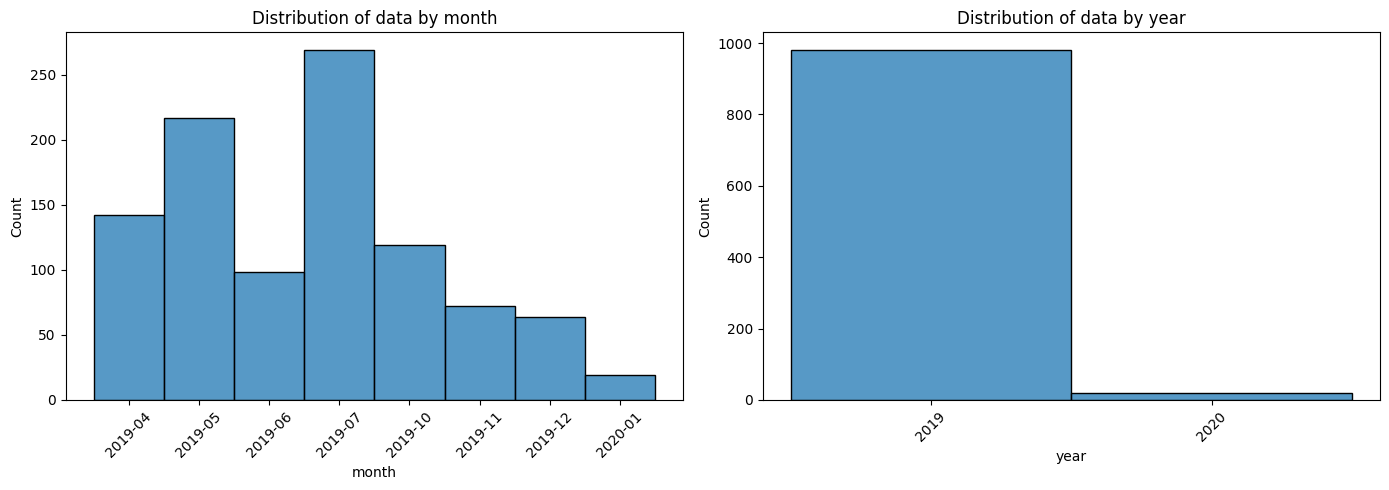

In [9]:
fig = plt.figure(figsize=(14, 5))
for index, param in enumerate(["month", "year"]):
    plt.subplot(1, 2, index+1)
    df[f"{param}_str"] = df[param].astype(str)
    sns.histplot(df[f"{param}_str"], kde=False, color="Tab:blue")
    plt.xticks(rotation=45)
    plt.title(f"Distribution of data by {param}")
    plt.xlabel(param)
    plt.ylabel("Count")

fig.tight_layout()

### Analysis: Heating & Cooling
* Generally cooling and heating follow a similar pattern. On a month to month basis, if there is more cooling requirement, then there is also more heating requirement
* The temperature variation starts to increase from April 2019 and peaks in July 2019.
* This also bring me to the conclusion, that probably the data for June 2019 is missing.

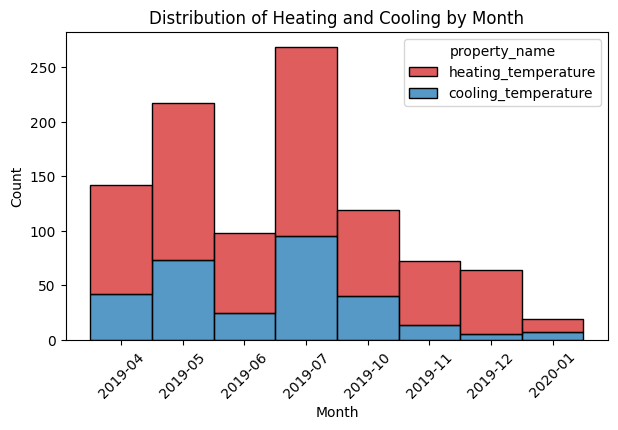

In [10]:
fig = plt.figure(figsize=(7, 4))
sns.histplot(
    data=df,
    x="month_str",
    hue="property_name",
    multiple="stack",
    palette={
        "heating_temperature": "Tab:red",
        "cooling_temperature": "Tab:blue"
    }
)
plt.xticks(rotation=45)
plt.title("Distribution of Heating and Cooling by Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

### Analysis: Heating & Cooling
* Heating
    * Median heating temperature stays between 33 & 35 degrees except for Nov-2019 which is only slightly higher
    * The box plots are very compact across different months, in other words interquartile range (IQR) is narrow and close to median. This suggest consistent heating requirements and that the heating temperature is constantly well maintained.
    * There do not seem to be any extreme outliers in terms of upper extremes of heating temperature. They are all below 40 degrees.
* Cooling
    * Median cooling temperature has a lot of variation. It is as low as 15 degrees and as high as almost 24 degrees.
    * There is high variability in cooling temperatures. The IQR is very wide especially in summer months. This aligns with the fact that more cooling is required in summer months.
    * The cooling requirements in winter months is lower and here Nov-2019 seems to be an outlier. It has considerably high median cooling temperature. 

* Some outliers based on statistics can also be identified here using `showfliers=True` parameter

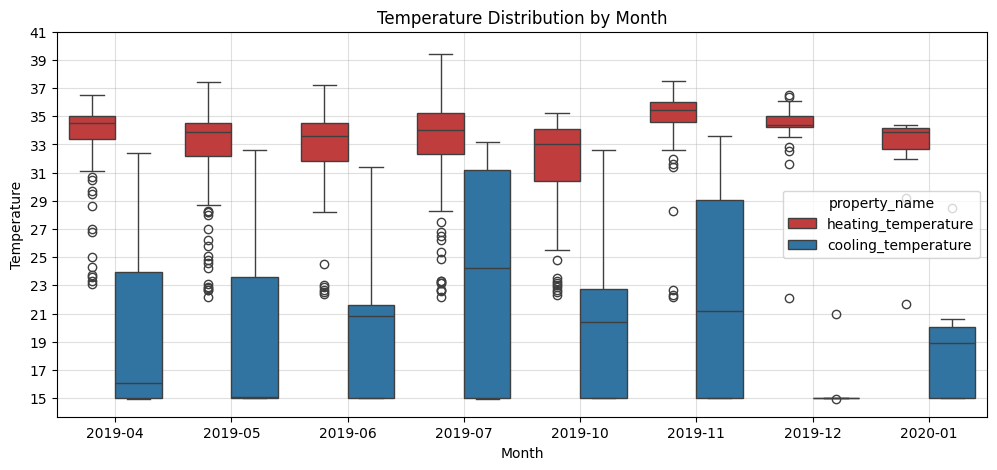

In [11]:
fig = plt.figure(figsize=(12, 5))
sns.boxplot(
    data=df,
    x='month',
    y='temperature',
    hue='property_name',
    showfliers=True, # False
    palette={
        "heating_temperature": "Tab:red",
        "cooling_temperature": "Tab:blue"
    }
)
plt.title('Temperature Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.yticks(np.arange(15, 43, 2))
plt.grid(alpha=0.4)
plt.show()


### Analysis: Heating & Cooling Time-Series

**Explanation** Here there are two plots:
1. The first plot is line plot of heating and cooling temperature for each month in the order of occurrence
2. The second plot is a line plot with date on x-axis. That's why to have a better understanding of the data, heating and cooling temperatures have markers assigned for each point and therefore there are multiple points for each date.

**Observations (Plot 1)**
* Apr-2019 to Oct-2019 plots:
    * It is clearly visible that heating and cooling temperature peaks seem to coincide at 22.5-25 temperature range
* Jul-2019 plot:
    * If we focus on Jul-2019 plot, here the cooling temperature seems to have many outliers as the cooling temperature is exceptionally high. It is also evident in the boxplots.
    * It appears that during Jul-2019 it was difficult to achieve the thermal equilibrium. The cooling temperature sensor might have malfunctioned or the controller was not working properly.
* Nov-2019 to Jan-2020 plots:
    * These time periods have extremely less data points. It looks like there is a sudden drop in heating temperature. These could be identified as outliers by using rolling mean and rolling standard deviation.
    * But on the other hand, if more data points are available similar to other months, these sharp drops in heating temperature could be justified. The drop in heating temperatures aligns with my hypothesis that a thermal equilibrium should be reached.
    * The cooling temperature also seems to have random and abrupt variations.

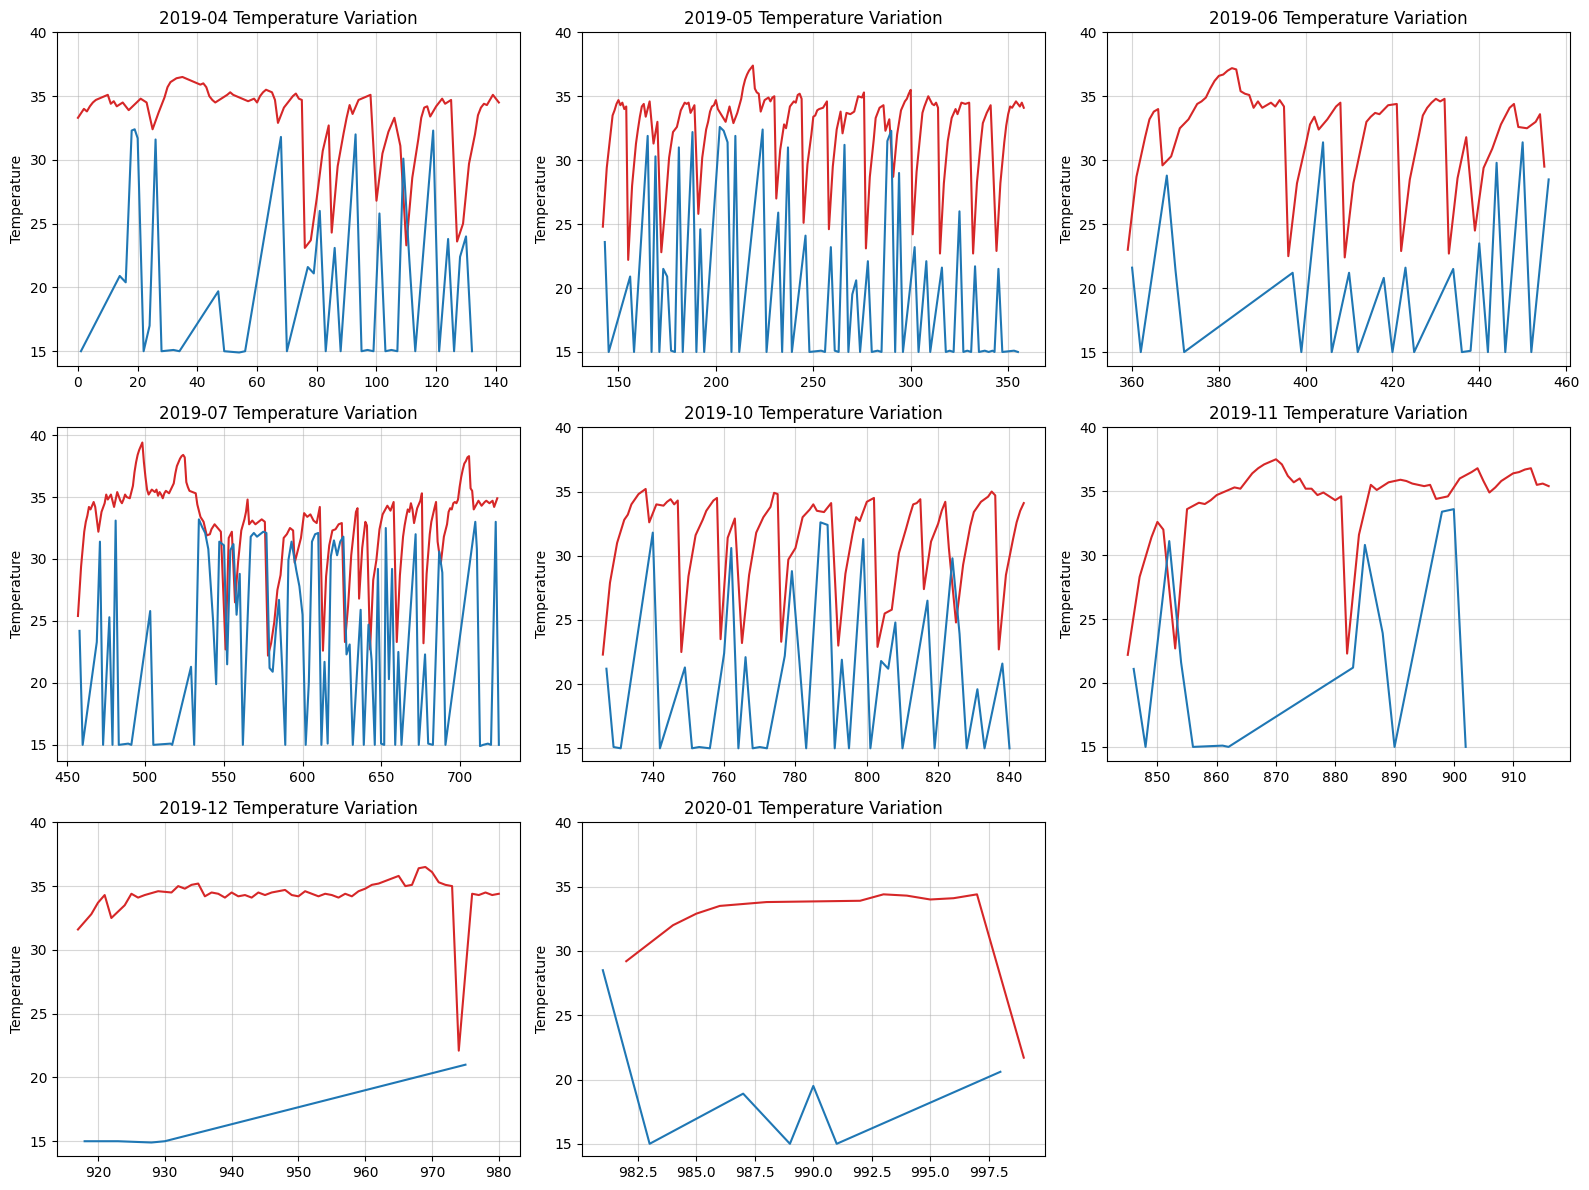

In [12]:
fig = plt.figure(figsize=(16, 12))
for index, month in enumerate(df["month"].unique()):
    plt.subplot(3, 3, index+1)
    plt.plot(
        df[(df.month == month) & (df.property_name == "heating_temperature")]["temperature"],
        color="Tab:red"
    )
    plt.plot(
        df[(df.month == month) & (df.property_name == "cooling_temperature")]["temperature"],
        color="Tab:blue"
    )
    plt.ylabel("Temperature")
    plt.yticks(np.arange(15, 41, 5))
    plt.title(f"{month} Temperature Variation")
    plt.grid(alpha=0.5)
 
fig.tight_layout()

**Observations (Plot 2)**
* As mentioned in the observations of previous plot, the end goal seems to be to achieve thermal equilibrium of around 22.5-25 degrees.
* From the plots below, it seems that the process of reaching the equilibrium is not performed on daily basis.
* There is huge variation on when the data is available for a particular month. Sometimes the data is available for each day of a particular week (05-05-2019 to 09-05-2019) and sometimes once in 15 days (17-06-2019 to 29-06-2019).
* This could be due to two reasons:
    * Either the data for intermediate days/weeks is missing
    * The process that generates the data is randomly started (less likely)

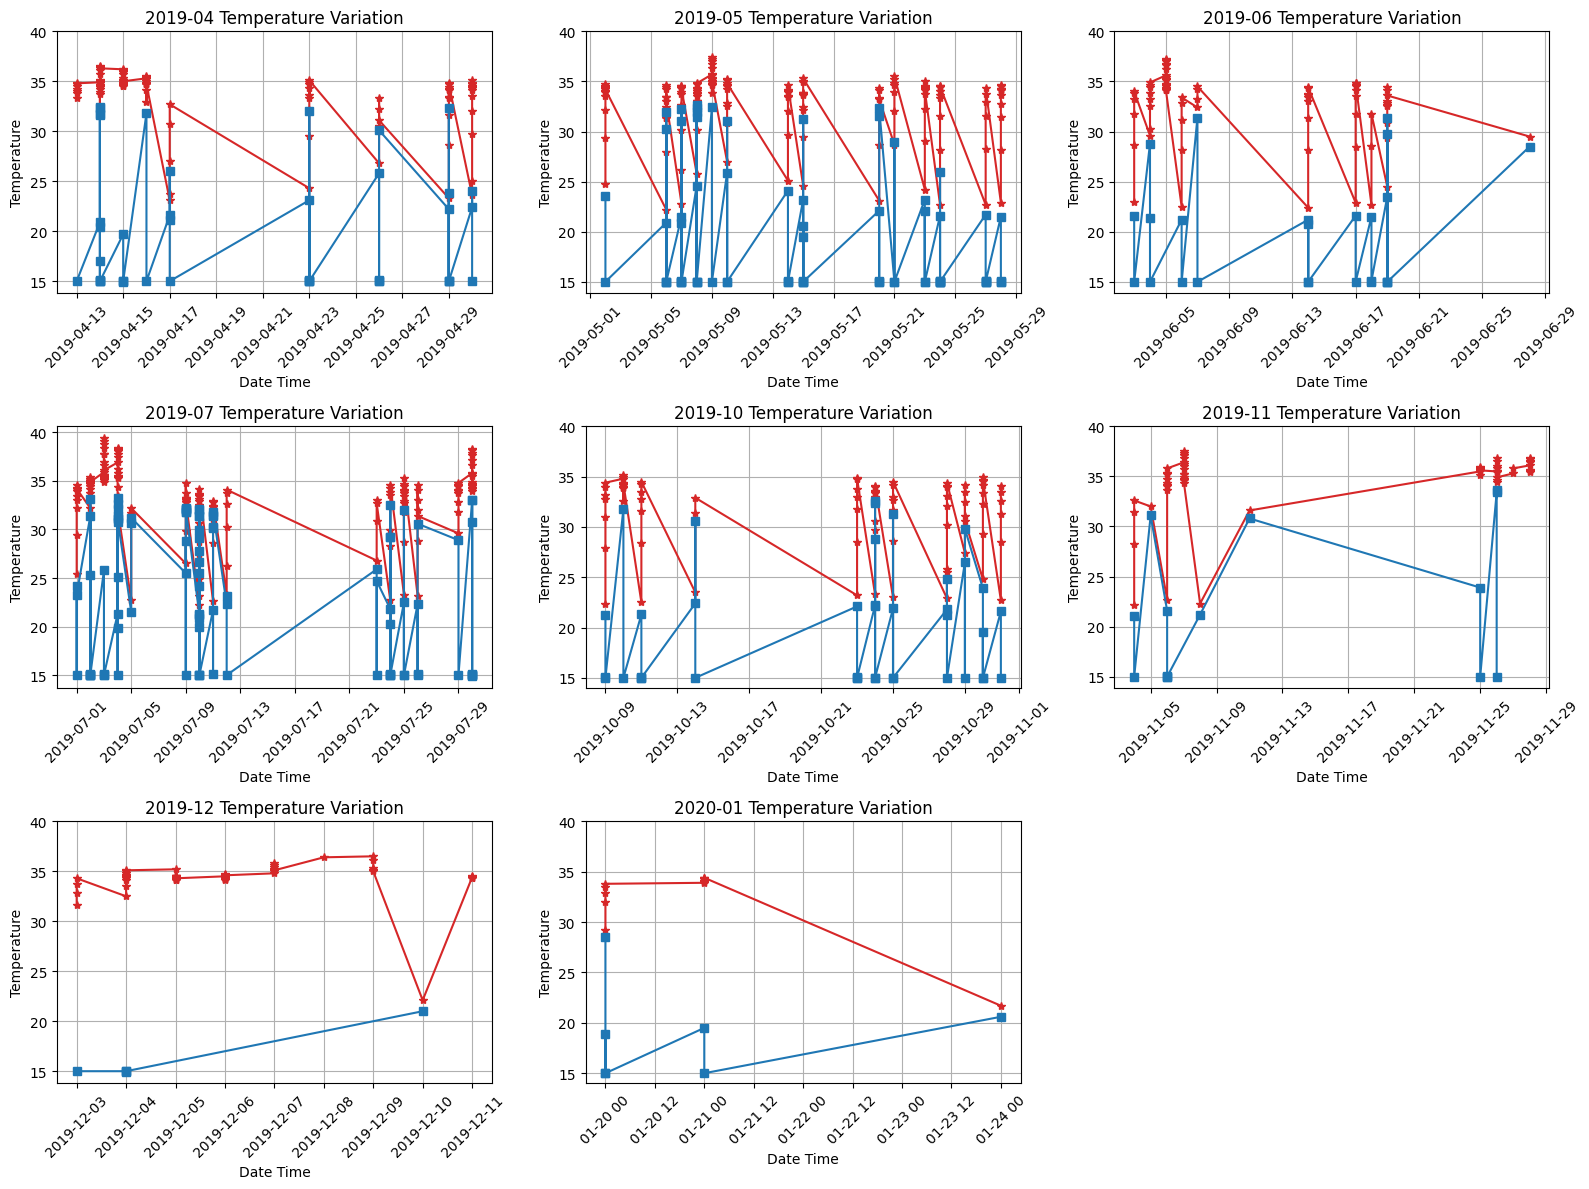

In [13]:
fig = plt.figure(figsize=(16, 12))
for index, month in enumerate(df["month"].unique()):
    plt.subplot(3, 3, index+1)
    plt.plot(
        df[(df.month == month) & (df.property_name == "heating_temperature")]["date"],
        df[(df.month == month) & (df.property_name == "heating_temperature")]["temperature"],
        color="Tab:red",
        marker="*",
    )
    plt.plot(
        df[(df.month == month) & (df.property_name == "cooling_temperature")]["date"],
        df[(df.month == month) & (df.property_name == "cooling_temperature")]["temperature"],
        color="Tab:blue",
        marker="s",
    )
    plt.xlabel("Date Time")
    plt.ylabel("Temperature")
    plt.xticks(rotation=45)
    plt.yticks(np.arange(15, 41, 5))
    plt.title(f"{month} Temperature Variation")
    plt.grid(0.5)
 
fig.tight_layout()

In [14]:
for month in df["month"].unique():
    heating = df[(df.month == month) & (df['property_name'] == 'heating_temperature')]['temperature'].reset_index(drop=True)
    cooling = df[(df.month == month) & (df['property_name'] == 'cooling_temperature')]['temperature'].reset_index(drop=True)
    correlation = heating.corr(cooling)
    print(f"Correlation between heating and cooling temperatures for {month}: {correlation}")

Correlation between heating and cooling temperatures for 2019-04: -0.015086874145407297
Correlation between heating and cooling temperatures for 2019-05: -0.1067992115873981
Correlation between heating and cooling temperatures for 2019-06: -0.06163654864638312
Correlation between heating and cooling temperatures for 2019-07: 0.21714569600444658
Correlation between heating and cooling temperatures for 2019-10: -0.11916870774445533
Correlation between heating and cooling temperatures for 2019-11: 0.3055550330526715
Correlation between heating and cooling temperatures for 2019-12: -0.2602881694361924
Correlation between heating and cooling temperatures for 2020-01: -0.681247945112407
